<a href="https://colab.research.google.com/github/Khaydaraliev/Toshkent-uy-narxini-bashorat-qilish/blob/main/Toshkent_uy_narxlarini_bashorat_qilish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Toshkent uy narxlarini bashorat qilish.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# **Ma'lumotlarni o'rganamiz, analiz qilib va kerakli o'zgartrishlarni bajaramiz**


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


**Yuqoridagi m'lumotlardan 'size' (o'lcham) va 'price' (narx) ustunlari object ekanligini ko'rishimiz mumkin. Bu ustunlarni sonli ustunlarga o'zgartrish kerak.**

In [4]:
df_n = df
df_f = df_n.drop(['location', 'district'], axis=1)
for col in list(df_f.columns):
       if type(col) != int:
            df_n[col] = pd.to_numeric(df_f[col], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7564 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7466 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 413.8+ KB


# **O'zgartrilgan ma'lumotlarimizni tekshiramiz.**

In [6]:
df_n.isna().sum()

location       0
district       0
rooms          0
size           1
level          0
max_levels     0
price         99
dtype: int64

**'size' ustunida bir dona va 'price' ustunida 99 ta NaN qiymatlar mavjud ekanini ko'ramiz.
'size' ustunidagi bir dona NaN qiymatni tashlab yuboramiz.
'price' ustunidagi qiymatlarni o'rtacha qiymatga o'zgartrib chiqmiz.**

In [7]:
df_n = df_n.dropna()
df_n.isna().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

**NaN qiymatlar ustida ishladik. Endi ma'lumotlarni o'rganib chiqamiz.**

In [8]:
print(f"max_size : {df_n['size'].max()}   min_size : {df_n['size'].min()}")

max_size : 70000.0   min_size : 1.0


**Uylarning o'lchamlari normal oraliqda emas minimal o'cham 1 kv.metr desak max o'lcham 70000 kv.metr, bu judaham katta. Demak ma'lumotlarimizni filtrlashimiz kerak.**

In [9]:
df_n[df_n['size']<15][df_n['rooms']>1]

<ipython-input-9-2010e26a03e4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['size']<15][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
796,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,5.0,1,4,50000.0
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.0,6,9,45000.0
2147,"город Ташкент, Учтепинский район, Куксарой",Учтепинский,8,8.5,2,2,230000.0
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.0,1,1,50000.0
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.0,1,3,26000.0
4337,"город Ташкент, Мирабадский район, Нукус",Мирабадский,3,5.0,4,5,46600.0
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.8,2,2,90000.0
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.0,2,5,35000.0


In [10]:
df_n[df_n['size']>250]

,location,district,rooms,size,level,max_levels,price
262,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000.0
307,"город Ташкент, Юнусабадский район, ц-5 Киёт (Ц...",Юнусабадский,5,255.0,1,8,270000.0
308,"город Ташкент, Юнусабадский район, ц-5 Киёт (Ц...",Юнусабадский,6,266.0,1,8,285000.0
741,"город Ташкент, Мирабадский район, Айбека (пр-т...",Мирабадский,5,300.0,3,8,425000.0
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500.0
1553,"город Ташкент, Мирабадский район, Шахрисабз",Мирабадский,4,280.0,4,8,320000.0
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600.0
1649,"город Ташкент, Шайхантахурский район, Ипакчи",Шайхантахурский,6,268.0,1,3,260000.0
1674,"город Ташкент, Яккасарайский район, Кичик Бешагач",Яккасарайский,3,265.0,1,9,198750.0
1675,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000.0


**Oddatda 1 xonali uylarnig minimal o'lchami 10 kv.metr atrofida bo'ladi. Lekin bizga berilgan ma'lumotlarda 10 kv.m dan kichik va xonalari 2 va undan ortiq bo'lgan uylar mavjud.
Bundan tashqari xonalar soni 4 tadan kam lekin o'lchami juda katta bo'lgan uylar ham bor. Bu ma'lumotlar bizning modelimizni noto'g'ri bashorat qilishiga tasir qilishi mumkin, shuning uchun bu ma'lumotlarni tashlab yuboramiz.**

In [11]:
df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['size']>250].index)
df_n = df_n.drop(df_n[df_n['size']==2100].index)

<ipython-input-11-dd9e9b5e3859>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)


In [12]:
print(f"max_price : {df_n['price'].max()}   min_price : {df_n['price'].min()}")

max_price : 52000000.0   min_price : 2.0


**Uylarning narxlaridaham ushbu nomutanosiblikni kuzatishimiz mumkin minimal narx 2 USD desak max narx 52000000 USD , buham juda katta. Ma'lumotlarimizni yana filtrlashimiz kerak.**

In [13]:
df_n[df_n['price']<7000][df_n['rooms']>1]

<ipython-input-13-3083a2b11fb6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n[df_n['price']<7000][df_n['rooms']>1]


,location,district,rooms,size,level,max_levels,price
273,"город Ташкент, Яккасарайский район, Нукус",Яккасарайский,3,100.0,3,4,1000.0
3832,"город Ташкент, Яккасарайский район, Абдуллы Ка...",Яккасарайский,4,170.0,2,6,2000.0
5073,"город Ташкент, Сергелийский район, Srrgili 8uc...",Сергелийский,2,54.0,7,7,2864.0
5719,"город Ташкент, Шайхантахурский район, Караташ",Шайхантахурский,7,230.0,2,5,1000.0
7224,"город Ташкент, Учтепинский район, Чиланзар-11",Учтепинский,2,51.0,2,4,2.0


In [14]:
df_n[df_n['price']>200000]

,location,district,rooms,size,level,max_levels,price
189,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,4,187.0,2,5,210000.0
310,"город Ташкент, Яккасарайский район, Кичик Бешагач",Яккасарайский,4,210.0,4,8,265000.0
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000.0
345,"город Ташкент, Мирабадский район, Окбилол",Мирабадский,4,165.0,1,8,264999.0
346,"город Ташкент, Мирабадский район, Янгизамон",Мирабадский,4,215.0,5,8,259999.0
...,...,...,...,...,...,...,...
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114.0,5,7,15504000.0
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85.0,2,3,6630000.0
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96.0,2,5,5568000.0
7466,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,2,42.0,1,3,1470000.0


**Demak xonalar soni 2 va undan ortiq lekin narxlari juda past va xonalar soni 9-10 tadan kam lekin narxi juda yuqori bo'lgan real narxga to'g'ri kelmaydigan uylarni ko'rishimiz mumkin. Bu uylarni ham tashlab yuboramiz.**

In [15]:
df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
df_n = df_n.drop(df_n[df_n['price']>200000].index)

<ipython-input-15-316b0a4ee742>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)


# **Filtrlangan ma'lumotlarimizni endi Grafik usulda taxlil qilamiz.**

In [16]:
df_n = df_n.reset_index(drop=True)

df_1 = df_n.drop(['location', 'district'], axis=1)

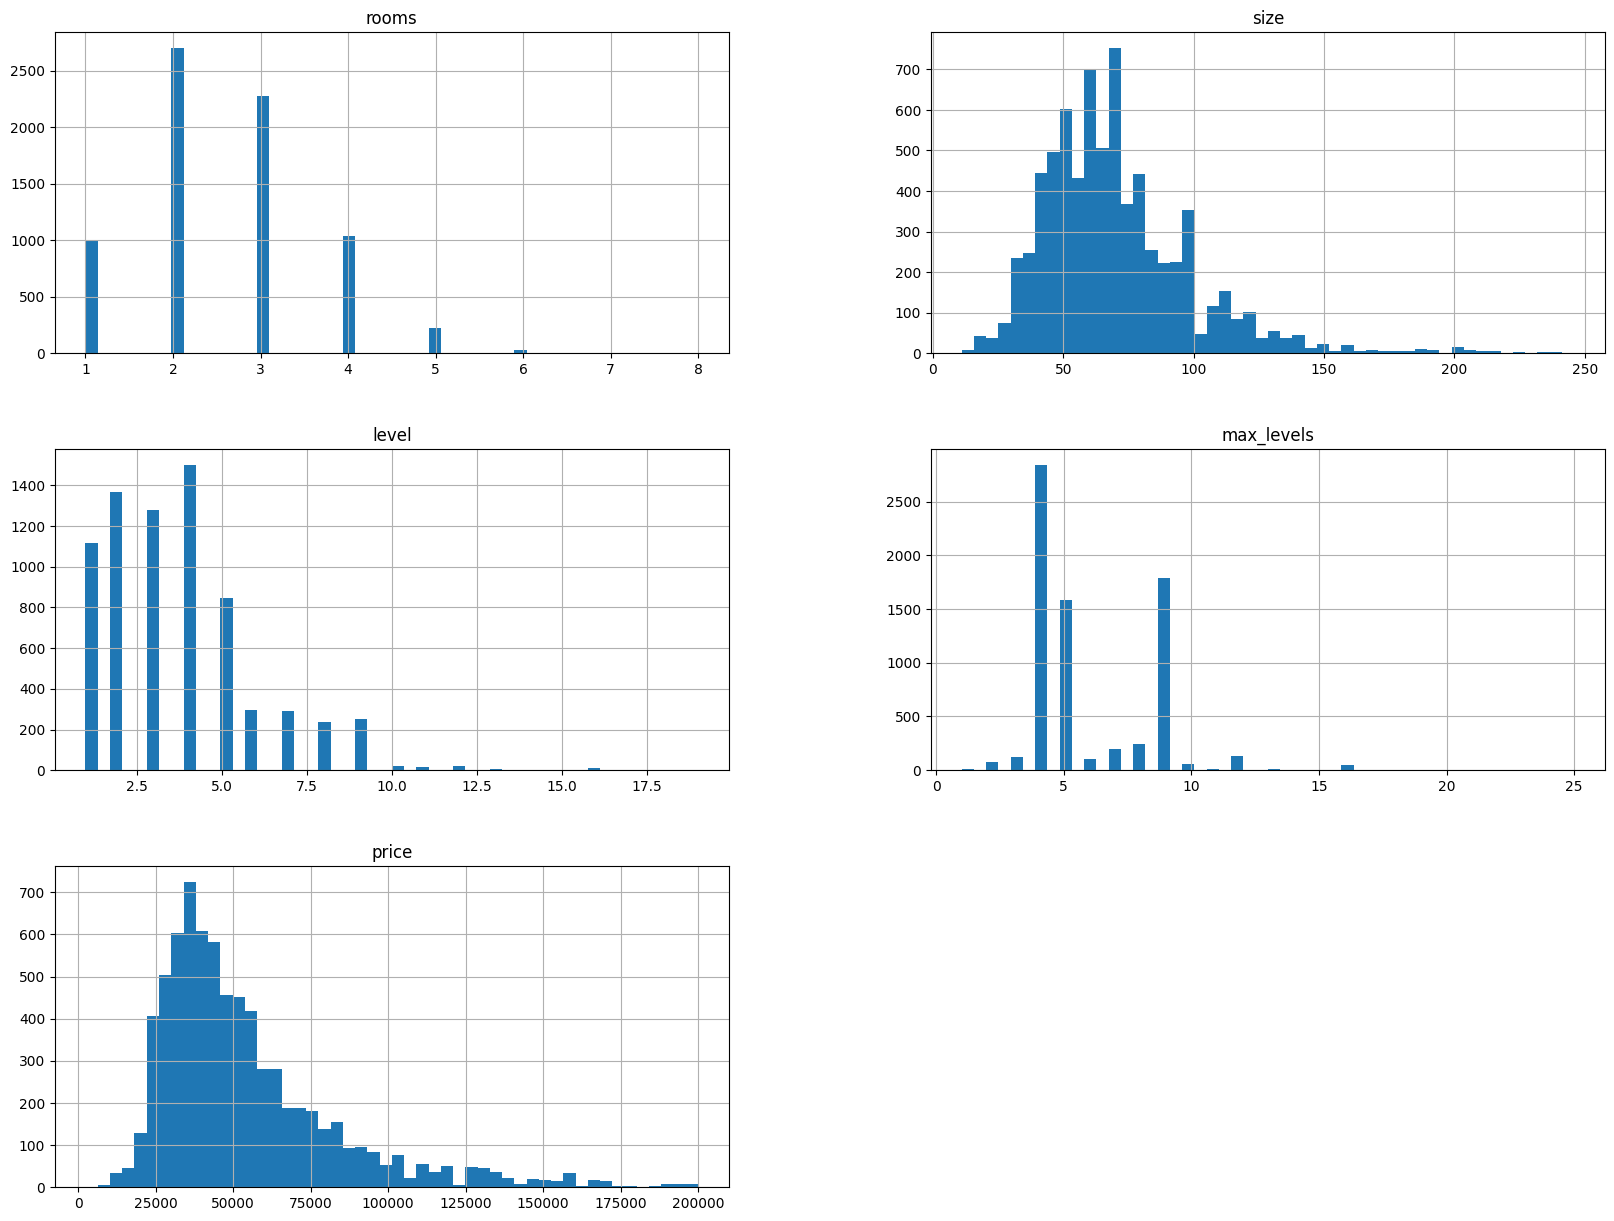

In [17]:
%matplotlib inline
df_1.hist(bins=50, figsize=(20,15))
plt.show()

# **UYLARNING NARXI BO'YICHA**

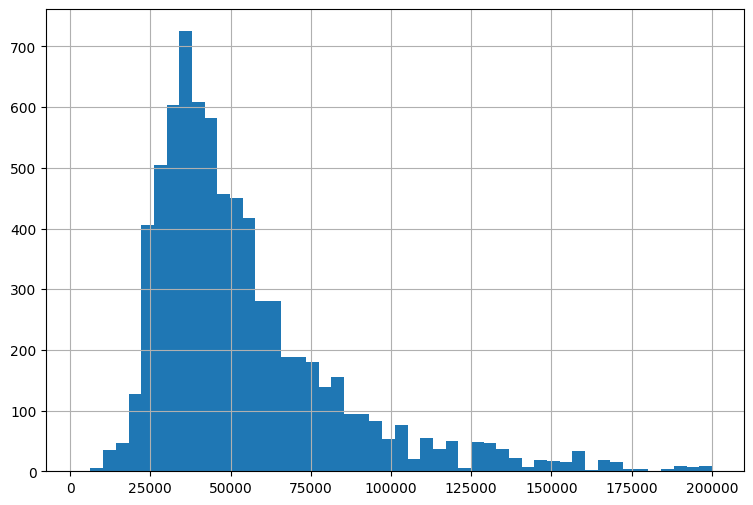

In [18]:
%matplotlib inline
df_p=df_n[['price']]
df_p['price'].hist(bins=50, figsize=(9,6))
plt.show()

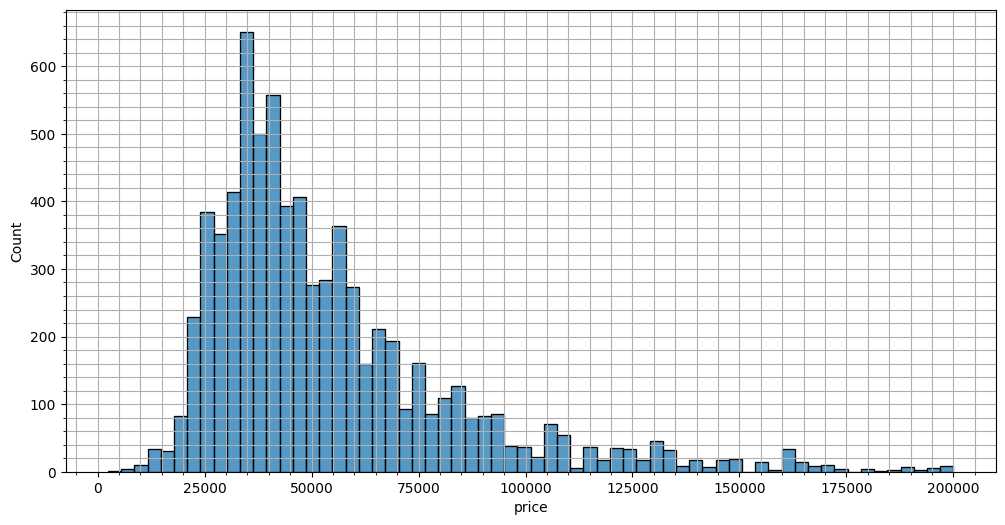

In [19]:
df_pf=df_n[df_n['price']<250000]
plt.figure(figsize=(12,6))
sns.histplot(data=df_pf, x='price')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Bu grafikdan 80 % ga yaqin uylarning narxi 20000 - 100000 USD oralig'ida ekanligini ko'rishimiz mumkin.**

# **UYLARNING MAYDONI BO'YICHA**

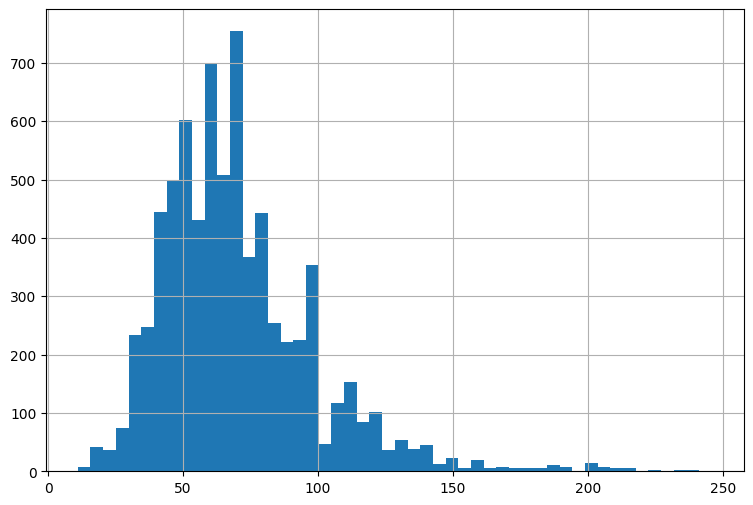

In [20]:
%matplotlib inline
df_s=df_n[['size']]
df_s['size'].hist(bins=50, figsize=(9,6))
plt.show()

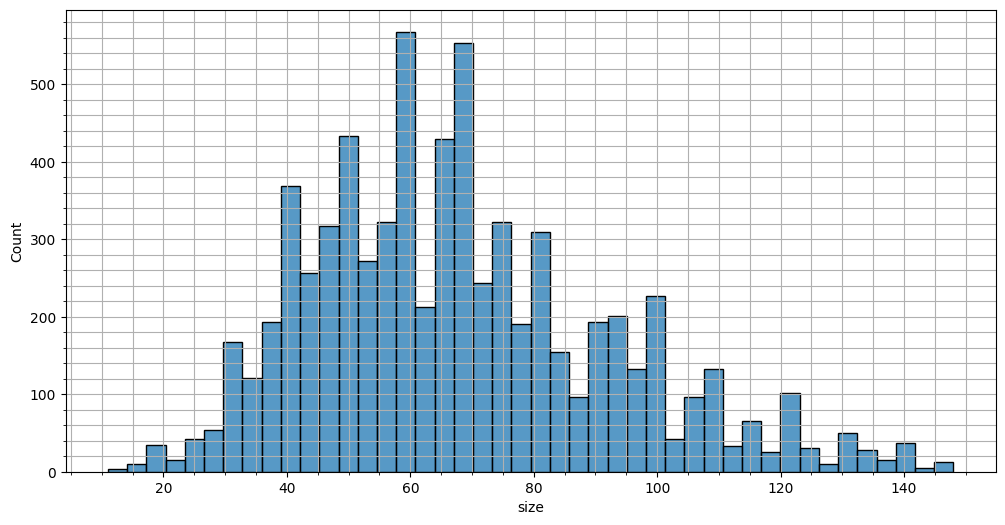

In [21]:
df_sf=df_n[df_n['size']<150]
plt.figure(figsize=(12,6))
sns.histplot(data=df_sf, x='size')
plt.grid(which='both')
plt.minorticks_on()
plt.show()

**Bu grafikdan aksar uylarning maydoni 25 - 100 kv.metr oralig'ida ekanligini ko'rishimiz mumkin.**

# **UYLARNING XONALAR SONI BO'YICHA**

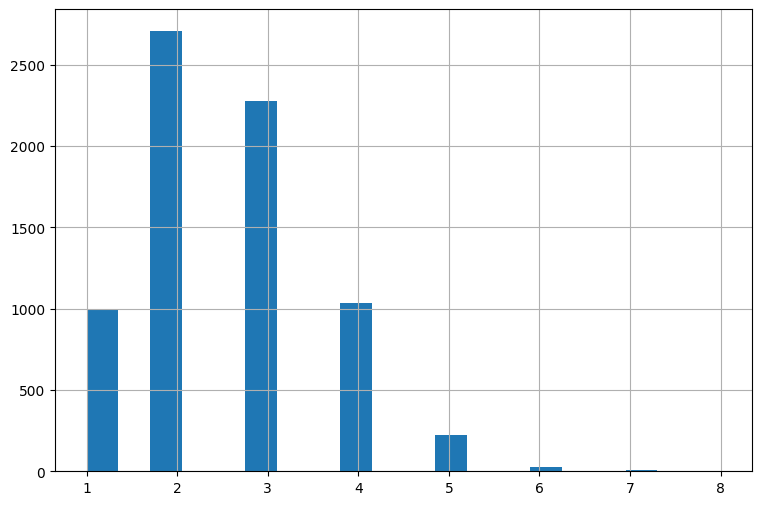

In [22]:
%matplotlib inline
df_r=df_n[['rooms']]
df_r['rooms'].hist(bins=20, figsize=(9,6))
plt.show()

**Uylarning katta qismi 2 xonlidan 4 xonaligacha ekanini ko'rishimiz mumkin.**

# **UY NARXIGA ENG KO'P TASIR QILADIGAN PARAMETRLARNI KO'RIB CHIQAMIZ**

In [23]:
df_1.corrwith(df_1['price']).sort_values(ascending=False)

price         1.000000
size          0.787158
rooms         0.603204
max_levels    0.268437
level         0.085466
dtype: float64

**Bu ro'yxatimizda uylarning maydoni va xonalar soni uy narxini asosiy belgilab beruvchi parametrlar ekanini ko'ramiz.**

# **Bu parametrlarni grafik ko'rinishi**

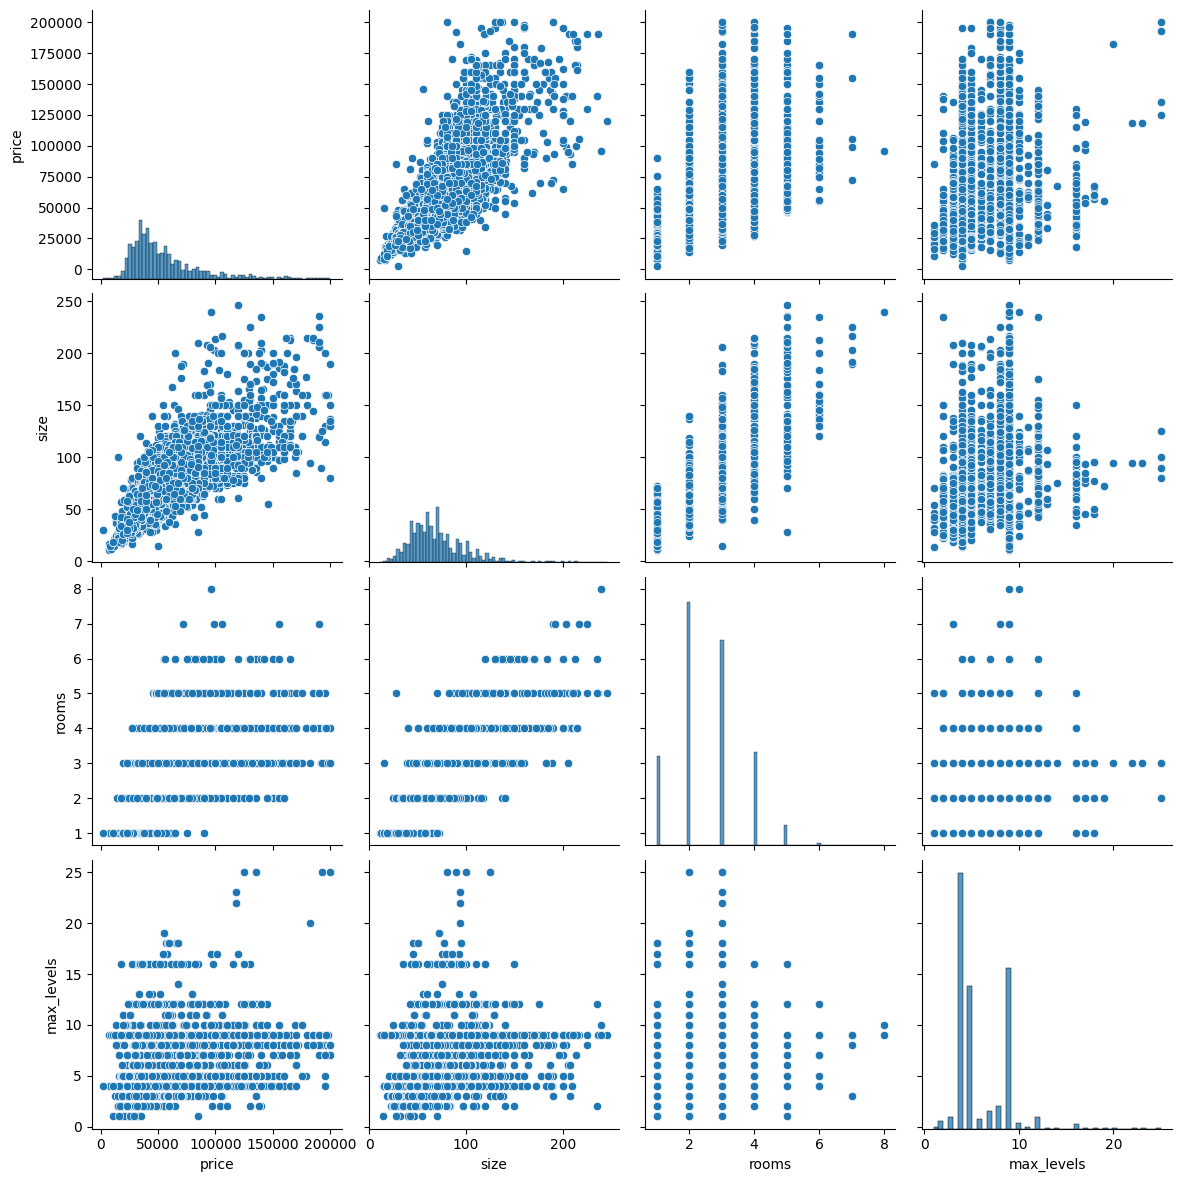

In [24]:
cols = ['price','size','rooms','max_levels']
sns.pairplot(df_1[cols], height=3)
plt.show()

**Grafiklardan ham ko'rinib turibdi. Uy maydonlarining ortishi natijasida uy narxlarining ko'tarilishi kuzatilayabdi. Bu natijani xonalar soni ortishi bilan ham kuzatish mumkin.**

# **Uy narxiga eng katta ta'sir qiluvchi omil bu uy maydonlari ekan. Ushbu grafigimizda bu narsa judaham yaxshi ko'rinib turibdi.**

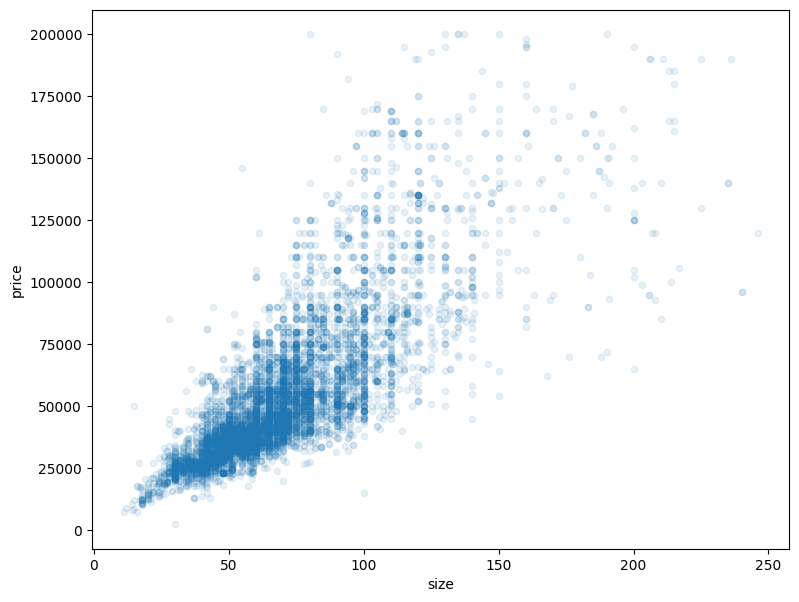

In [25]:
df_n.plot(kind='scatter', x="size", y="price", alpha=0.1, figsize=(9,7))
plt.show()

# **Ma`lumotlarni ML uchun tayyolrash**

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
size_ix, price_ix = 3, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df_n = X.copy()
        df_f = df_n.drop(['location', 'district'], axis=1)
        for col in df_f.columns:
            if df_f[col].dtype == 'object':
                df_n[col] = pd.to_numeric(df_f[col], errors='coerce')
        df_n = df_n.dropna()
        df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['size']>250].index)
        df_n = df_n.drop(df_n[df_n['size']==2100].index)
        df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)
        df_n = df_n.drop(df_n[df_n['price']>200000].index)
        return df_n

combined_adder = CombinedAttributesAdder()

transformed_data = combined_adder.transform(df)

df_n = transformed_data

<ipython-input-27-0567843768dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['size']<15][df_n['rooms']>1].index)
<ipython-input-27-0567843768dd>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_n = df_n.drop(df_n[df_n['price']<7000][df_n['rooms']>1].index)


In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_n, test_size=0.2, random_state=42)

X_train = train_set.drop("price", axis=1)
y = train_set["price"].copy()

X_num = X_train.drop(["district",'location'], axis=1)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())
])

In [30]:
from sklearn.compose import ColumnTransformer

num_attribs = list(X_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OrdinalEncoder(), cat_attribs)
])

In [31]:
X_prepared = full_pipeline.fit_transform(X_train)
X_prepared[0:5,:]

array([[ 1.38904861e+00,  2.26157807e+00,  5.88274615e-01,
        -3.01186764e-03,  9.00000000e+00],
       [-5.51946480e-01, -3.42901073e-01,  1.92633657e+00,
         1.13881335e+00,  2.00000000e+00],
       [-5.51946480e-01, -6.90164959e-01,  1.42253963e-01,
        -7.64228676e-01,  1.10000000e+01],
       [-5.51946480e-01, -1.69269130e-01, -1.19580799e+00,
         1.13881335e+00,  2.00000000e+00],
       [ 1.38904861e+00,  9.07248915e-01,  1.92633657e+00,
         1.13881335e+00,  4.00000000e+00]])

# **Machine Learning**

**LinearRegression**

In [32]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [33]:
LR_model.fit(X_prepared, y)

LinearRegression()

In [34]:
# tasodifiy 5 ta qatorni ajratib olamiz
test_data = X_train.sample(5)
test_data

,location,district,rooms,size,level,max_levels
5447,"город Ташкент, Юнусабадский район, Юнусабад 14...",Юнусабадский,4,98.0,3,5
3549,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,5,191.0,8,9
6751,"город Ташкент, Мирабадский район, Шароф Рашидов",Мирабадский,3,84.0,3,4
7446,"город Ташкент, Яккасарайский район, ул.Ш.Руста...",Яккасарайский,3,67.0,1,3
1795,"город Ташкент, Яккасарайский район, 1-й проезд...",Яккасарайский,2,50.0,3,5


In [35]:
# yuqoridagi qatorlarga mos keluvchi narxlarni ajratib olamiz (biz aynan shu qiymatlarni bashorat qilishimiz kerak)
test_label = y.loc[test_data.index]
test_label

5447    80000.0
3549    93128.0
6751    90000.0
7446    70000.0
1795    65000.0
Name: price, dtype: float64

In [36]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.38904861,  0.97670169, -0.30376669, -0.38362027,  8.        ],
       [ 2.35954616,  4.20625583,  1.92633657,  1.13881335,  2.        ],
       [ 0.41855107,  0.49053225, -0.30376669, -0.76422868,  1.        ],
       [ 0.41855107, -0.09981635, -1.19580799, -1.14483708,  9.        ],
       [-0.55194648, -0.69016496, -0.30376669, -0.38362027,  9.        ]])

In [37]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([ 73497.68475737, 153249.40848646,  66648.39609806,  49549.90506891,
        36388.20863699])

In [38]:
pd.DataFrame({'Prognoz':predicted_data, 'Real baxosi': test_label})

,Prognoz,Real baxosi
5447,73497.684757,80000.0
3549,153249.408486,93128.0
6751,66648.396098,90000.0
7446,49549.905069,70000.0
1795,36388.208637,65000.0


In [39]:
test_set

,location,district,rooms,size,level,max_levels,price
1453,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,1,40.0,1,4,28500.0
4817,"город Ташкент, Мирзо-Улугбекский район, ОВИР",Мирзо-Улугбекский,1,30.0,2,4,30000.0
2973,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,2,52.0,1,4,41000.0
4252,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,3,115.0,2,9,115000.0
4134,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,1,42.0,4,9,28500.0
...,...,...,...,...,...,...,...
3598,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,3,68.0,2,4,40000.0
294,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,44.0,1,4,38000.0
2115,"город Ташкент, Юнусабадский район, Ислама Кари...",Юнусабадский,3,125.0,5,9,110000.0
2392,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,1,42.0,4,5,22800.0


In [40]:
X_test = test_set.drop('price', axis=1)
X_test

,location,district,rooms,size,level,max_levels
1453,"город Ташкент, Чиланзарский район, Чиланзар 8-...",Чиланзарский,1,40.0,1,4
4817,"город Ташкент, Мирзо-Улугбекский район, ОВИР",Мирзо-Улугбекский,1,30.0,2,4
2973,"город Ташкент, Чиланзарский район, Чиланзар 5-...",Чиланзарский,2,52.0,1,4
4252,"город Ташкент, Мирзо-Улугбекский район, Паркент",Мирзо-Улугбекский,3,115.0,2,9
4134,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,1,42.0,4,9
...,...,...,...,...,...,...
3598,"город Ташкент, Учтепинский район, Чиланзар 22-...",Учтепинский,3,68.0,2,4
294,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,2,44.0,1,4
2115,"город Ташкент, Юнусабадский район, Ислама Кари...",Юнусабадский,3,125.0,5,9
2392,"город Ташкент, Олмазорский район, Каракамыш кв...",Олмазорский,1,42.0,4,5


In [41]:
y_test = test_set['price'].copy()
y_test

1453     28500.0
4817     30000.0
2973     41000.0
4252    115000.0
4134     28500.0
          ...   
3598     40000.0
294      38000.0
2115    110000.0
2392     22800.0
2540    107000.0
Name: price, Length: 1454, dtype: float64

In [42]:
X_test_prepared = full_pipeline.transform(X_test)

In [43]:
y_predicted = LR_model.predict(X_test_prepared)

In [44]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17941.86731818831


In [45]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [46]:
y_predicted = Tree_model.predict(X_test_prepared)

In [47]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

17382.930228595284


In [48]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [49]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14072.473727351258


In [50]:
X = df_n.drop("price", axis=1)
y = df_n["price"].copy()

X_prepared = full_pipeline.transform(X)

In [51]:
X = df_n.drop("price", axis=1)
y = df_n["price"].copy()

X_prepared = full_pipeline.transform(X)

In [52]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [53]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [54]:
display_scores(LR_rmse_scores)

Scores: [15503.57062689 16322.65299131 19568.70800942 19487.73430478
 19613.89627834 19904.17506981 16581.96463684 15840.15278261
 18323.50189642 16111.99997825]
Mean: 17725.835657468433
Std.dev: 1718.8279629518222


In [55]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [16230.05797349 15890.30540481 21264.90704796 19244.53924355
 20522.69347181 18407.03808632 19022.71286804 17095.44397558
 19588.19143527 16346.75001222]
Mean: 18361.263951903766
Std.dev: 1792.6599989588763


In [56]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [12332.06484488 13351.55204236 16848.94260919 16998.78405478
 16696.85719079 15211.57719815 13764.213265   13294.72683785
 14307.11971112 13565.88912532]
Mean: 14637.172687944458
Std.dev: 1607.1253930934747
